# Risk and Returns - The Sharpe Ratio

This notebook shows how the Sharpe Ratio can be calculated. The Sharpe Ratio is a measure of assessing the return of an investment against a benchmark.

For this implementation, Amazon and Facebook stocks will be compared against the S&P 500 for the time period from 04.01.2016 to 30.12.2016.

After initial exploratory data analysis, the inputs for the Sharpe formula are calculated via average excess returns to arrive at an annualised measure.

## Table of Contents

1 Imports

2 Exploratory Data Analysis

3 Inputs for the Sharpe Ratio

4 The Sharpe Ratio

5 Conclusion

## 1 Imports

In [32]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # Set plot style for Jupyter notebook

In [33]:
# Read in the data
stock_data = pd.read_csv(
    "data/stock_data.csv", parse_dates=["Date"], index_col="Date"
).dropna()

benchmark_data = pd.read_csv(
    "data/benchmark_data.csv", parse_dates=["Date"], index_col="Date"
).dropna()

## 2 Exploratory Data Analysis

### 2.1 Inspect the Data

In [34]:
# Display summary for stock_data
print("Stocks\n")
print(stock_data.info())
print(stock_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002


In [35]:
# Display summary for benchmark_data
print("\nBenchmarks\n")
print(benchmark_data.info())
print(benchmark_data.head())


Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-08  1922.03


### 2.2 Summarise and Plot the Data

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


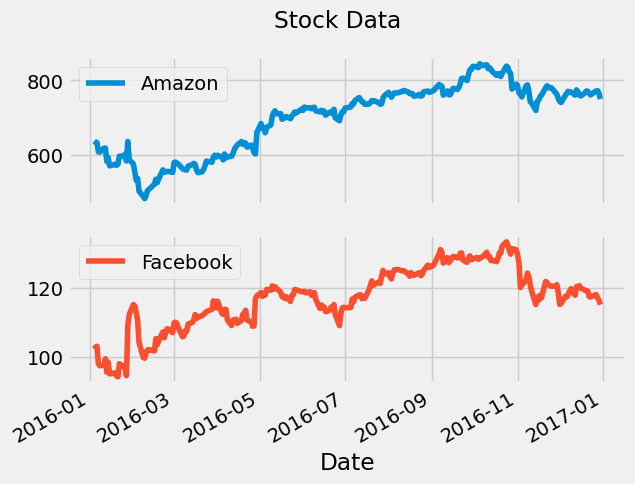

In [36]:
# Visualize the stock_data.
stock_data.plot(subplots=True, title="Stock Data")

# Summarize the stock_data
stock_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


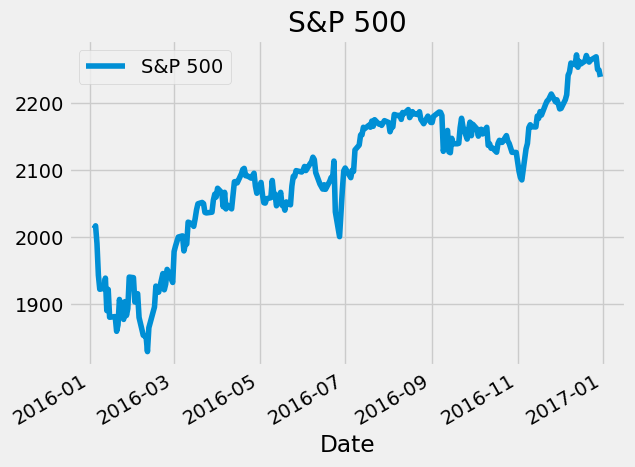

In [37]:
# Plot the benchmark_data
benchmark_data.plot(title="S&P 500")

# Summarize the benchmark_data
benchmark_data.describe()

## 3 Inputs for the Sharpe Ratio

### 3.1 Daily Stock Returns

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


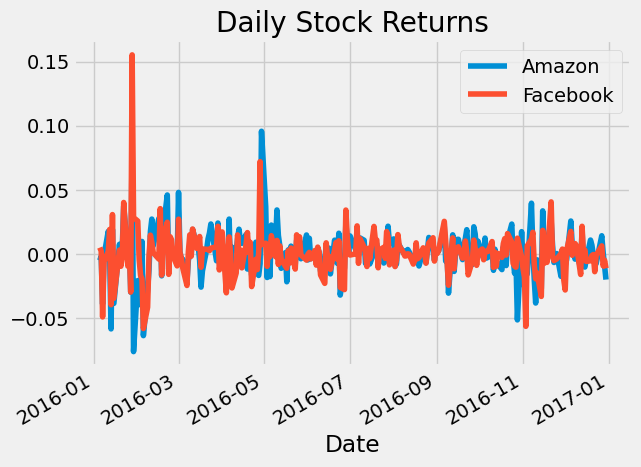

In [38]:
# Inputs for the Sharpe Ratio: Daily Stock Returns

# Calculate daily stock returns
stock_returns = stock_data.pct_change()

# Plot the daily returns
stock_returns.plot(title="Daily Stock Returns")

# Summarize the daily returns
stock_returns.describe()

### 3.2 Daily S&P 500 Returns

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

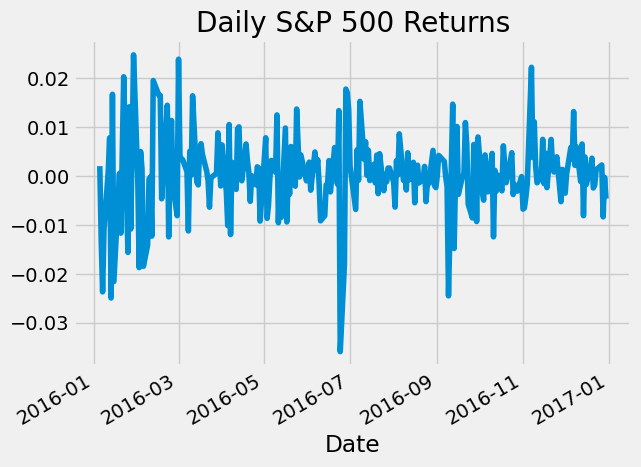

In [39]:
# Calculate daily benchmark_data returns
sp_returns = benchmark_data["S&P 500"].pct_change()

# Plot the daily returns
sp_returns.plot(title="Daily S&P 500 Returns")

# Summarize the daily returns
sp_returns.describe()

### 3.3 Excess Returns for Amazon and Facebook vs. S&P 500

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


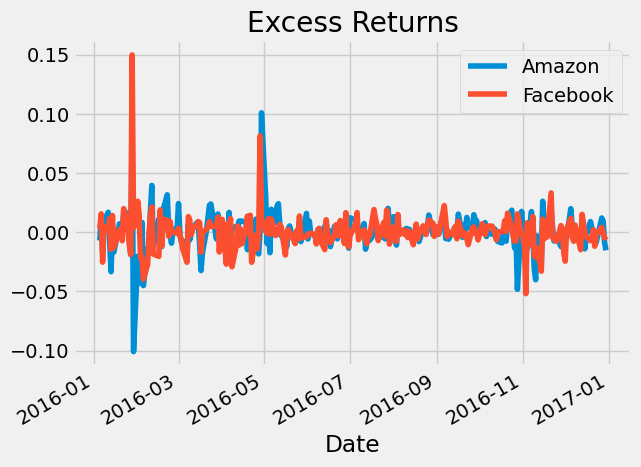

In [40]:
# Calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# Plot the excess_returns
excess_returns.plot(title="Excess Returns")

# Summarize the excess_returns
excess_returns.describe()

## 4 The Sharpe Ratio

### 4.1 Average Difference in Daily Returns Stocks vs. S&P 500

<Axes: title={'center': 'Mean of Return Difference'}>

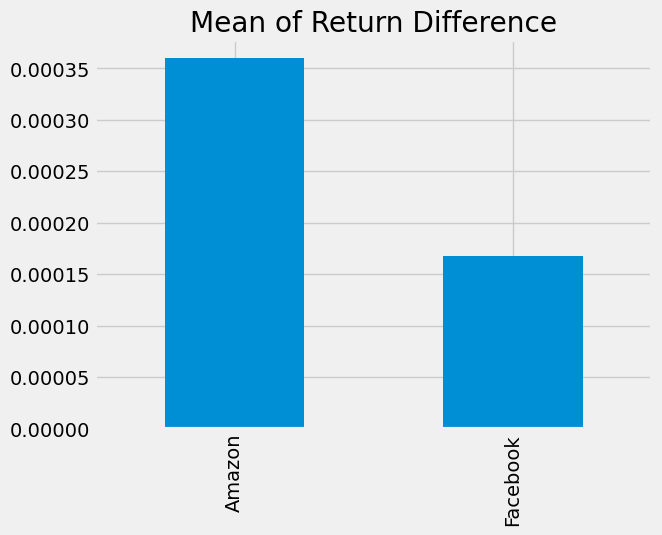

In [41]:
# Calculate the mean of excess_returns
avg_excess_return = excess_returns.mean()

# Plot avg_excess_returns
avg_excess_return.plot.bar(title="Mean of Return Difference")

### 4.2 Standard Deviation of the Return Difference

<Axes: title={'center': 'Standard Deviation of the Return Difference'}>

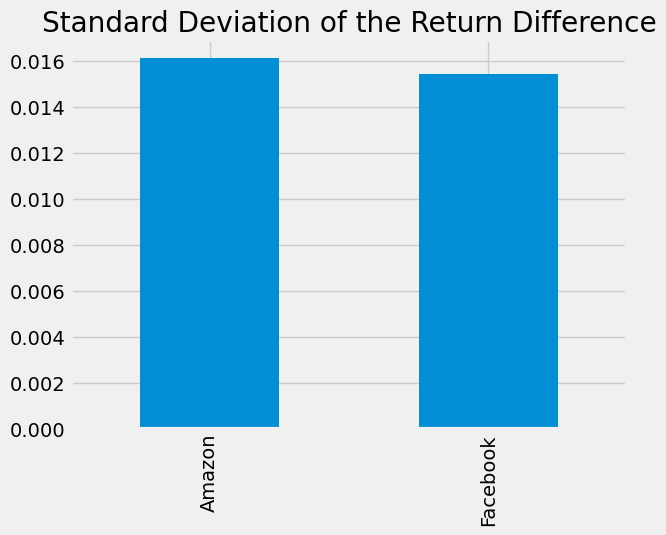

In [42]:
# Calculate the standard deviations
sd_excess_return = excess_returns.std()

# Plot the standard deviations
sd_excess_return.plot.bar(title="Standard Deviation of the Return Difference")

### 4.3 Ratio of Average and Standard Deviation of Excess Returns

In [46]:
# Calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Get the daily sharpe ratio
print(daily_sharpe_ratio)

Amazon      0.022318
Facebook    0.010856
dtype: float64


<Axes: title={'center': 'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

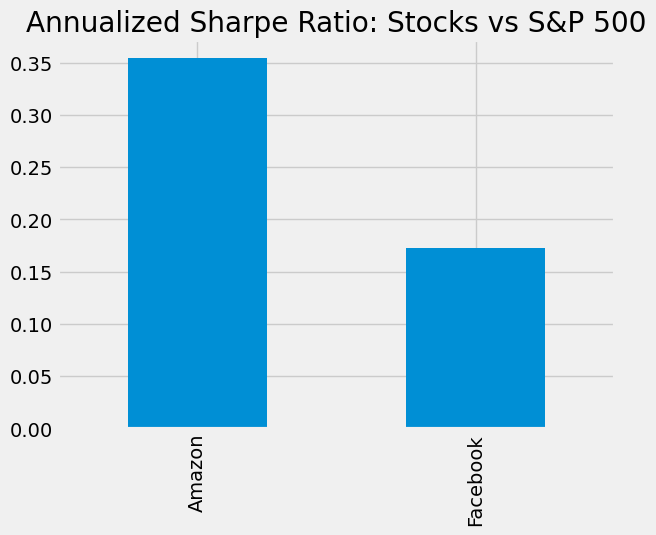

In [45]:
# Annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(
    title="Annualized Sharpe Ratio: Stocks vs S&P 500"
)

## 5 Conclusion

While both Amazon and Facebook stocks have similar standard deviations,
Amazon receives a higher Sharpe Ratio due to comparatively higher reward
for a given unit of risk in the observed time period.

buy_amazon = True